In [1]:
from screenTools import *

df = importPlates("./data/RA_SU22_screen/384wellscreen_06102022.xlsx", [1,2], [86, 104], plate_format=384)
print(df.shape)

# print first 100 rows without truncating
print(df.to_string())

(384, 5)
     value  plate_number  peptide row column
0    81717             1       86   A      1
1   125233             1       86   A      2
2   114981             1       86   A      3
3   194017             1       86   A      4
4   171267             1       86   A      5
5   188569             1       86   A      6
6   195035             1       86   A      7
7   208453             1       86   A      8
8    94460             1       86   A      9
9       21             1       86   A     10
10  243558             1       86   A     11
11  226220             1       86   A     12
12  144749             1       86   B      1
13   83289             1       86   B      2
14  148721             1       86   B      3
15  200644             1       86   B      4
16       9             1       86   B      5
17  191929             1       86   B      6
18     316             1       86   B      7
19     228             1       86   B      8
20       7             1       86   B      9
2

In [2]:
print(generate384list().to_string())

    1   2   3   4   5   6   7   8   9   10   11   12   1   2   3   4   5   6   7   8   9   10   11   12
A  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12
A  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  A11  A12
B  B1  B2  B3  B4  B5  B6  B7  B8  B9  B10  B11  B12  B1  B2  B3  B4  B5  B6  B7  B8  B9  B10  B11  B12
B  B1  B2  B3  B4  B5  B6  B7  B8  B9  B10  B11  B12  B1  B2  B3  B4  B5  B6  B7  B8  B9  B10  B11  B12
C  C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  C12  C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  C12
C  C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  C12  C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  C12
D  D1  D2  D3  D4  D5  D6  D7  D8  D9  D10  D11  D12  D1  D2  D3  D4  D5  D6  D7  D8  D9  D10  D11  D12
D  D1  D2  D3  D4  D5  D6  D7  D8  D9  D10  D11  D12  D1  D2  D3  D4  D5  D6  D7  D8  D9  D10  D11  D12
E  E1  E2  E3  E4  E5  E6  E7  E8  E9  E10  E11  E12  E1  E2  E3

In [3]:
controls = [
    "A1", "A2", "A3",
    "H10", "H11", "H12",
]

data = assignControls(df, positive=controls)
pp = pivotPlates(data)
print(pp)
ratios = computeRatios(pp)

        plate_number row column     condition   value       
peptide                                            86    104
0                  1   A      1      positive   81717  66078
1                  1   A     10  experimental      21      9
2                  1   A     11  experimental  243558   6378
3                  1   A     12  experimental  226220   7925
4                  1   A      2      positive  125233  52239
..               ...  ..    ...           ...     ...    ...
187                2   H      5  experimental  244979  77892
188                2   H      6  experimental  223176  39840
189                2   H      7  experimental  268731  19039
190                2   H      8  experimental  110100    823
191                2   H      9  experimental  272181      9

[192 rows x 6 columns]


In [4]:
hits = find_hits_by_plate(ratios, -1, 1, 1)
hits.head()

plate_number row column     condition   value           86/104  \
peptide                                            86    104             
0                  1   A      1      positive   81717  66078  0.092256   
1                  1   A     10  experimental      21      9  0.367977   
2                  1   A     11  experimental  243558   6378  1.581918   
3                  1   A     12  experimental  226220   7925  1.455532   
4                  1   A      2      positive  125233  52239  0.379724   

           104/86          to_pick  
peptide                             
0       -0.092256         positive  
1       -0.367977  not significant  
2       -1.581918               86  
3       -1.455532               86  
4       -0.379724         positive

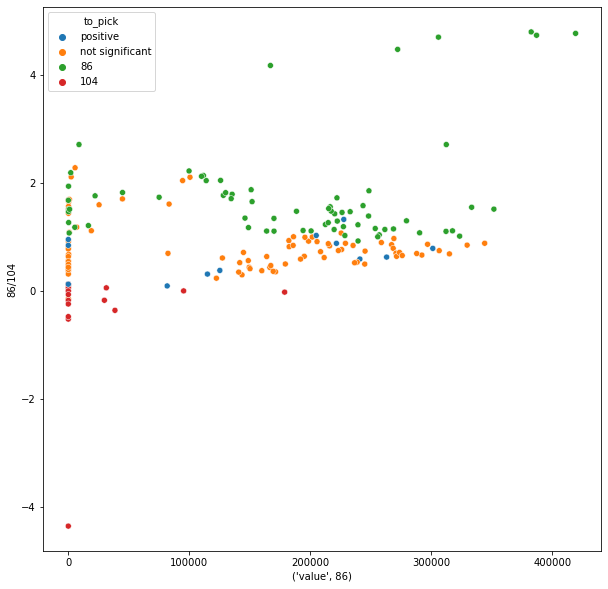

In [9]:
def plot_performance(data, peptide0, peptide1):

    fig = plt.figure(figsize=(10, 10))
    peptide0s = str(peptide0)
    peptide1s = str(peptide1)
    ratiostr = peptide0s + "/" + peptide1s

    sns.scatterplot(x=data["value", peptide0], y=ratiostr, data=data, hue="to_pick")

plot_performance(hits, 86, 104)